In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from numpy import median

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import tree

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
house_sales_df = pd.read_csv("house_sales_s1_mayel.csv",encoding='utf-8')

In [7]:
len(house_sales_df)

21613

In [8]:
house_sales_df.isnull().sum()

id                      0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot             1044
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
predict_bedrooms     1068
predict_bathrooms       0
dtype: int64

In [9]:
#hs_df= house_sales_df.dropna(axis=1, how='all')
#len(hs_df)

In [10]:
train_df, test_df = train_test_split(house_sales_df, test_size=0.5, random_state=42, shuffle=True)

In [11]:
len(train_df)

10806

In [12]:
len(test_df)

10807

In [13]:
#train_df[train_df['bedrooms'].isnull()]

In [14]:
#train_df.dropna(inplace=True)
#len(train_df)

In [17]:
regressor = DecisionTreeRegressor(max_depth=2)

In [18]:
regressor.fit(train_df[['bathrooms','grade','sqft_living']], train_df['price'])

DecisionTreeRegressor(max_depth=2)

In [19]:
y_predict = regressor.predict(test_df[['bathrooms','grade','sqft_living']])

In [20]:
len(y_predict)

10807

In [21]:
y_test=train_df['price']

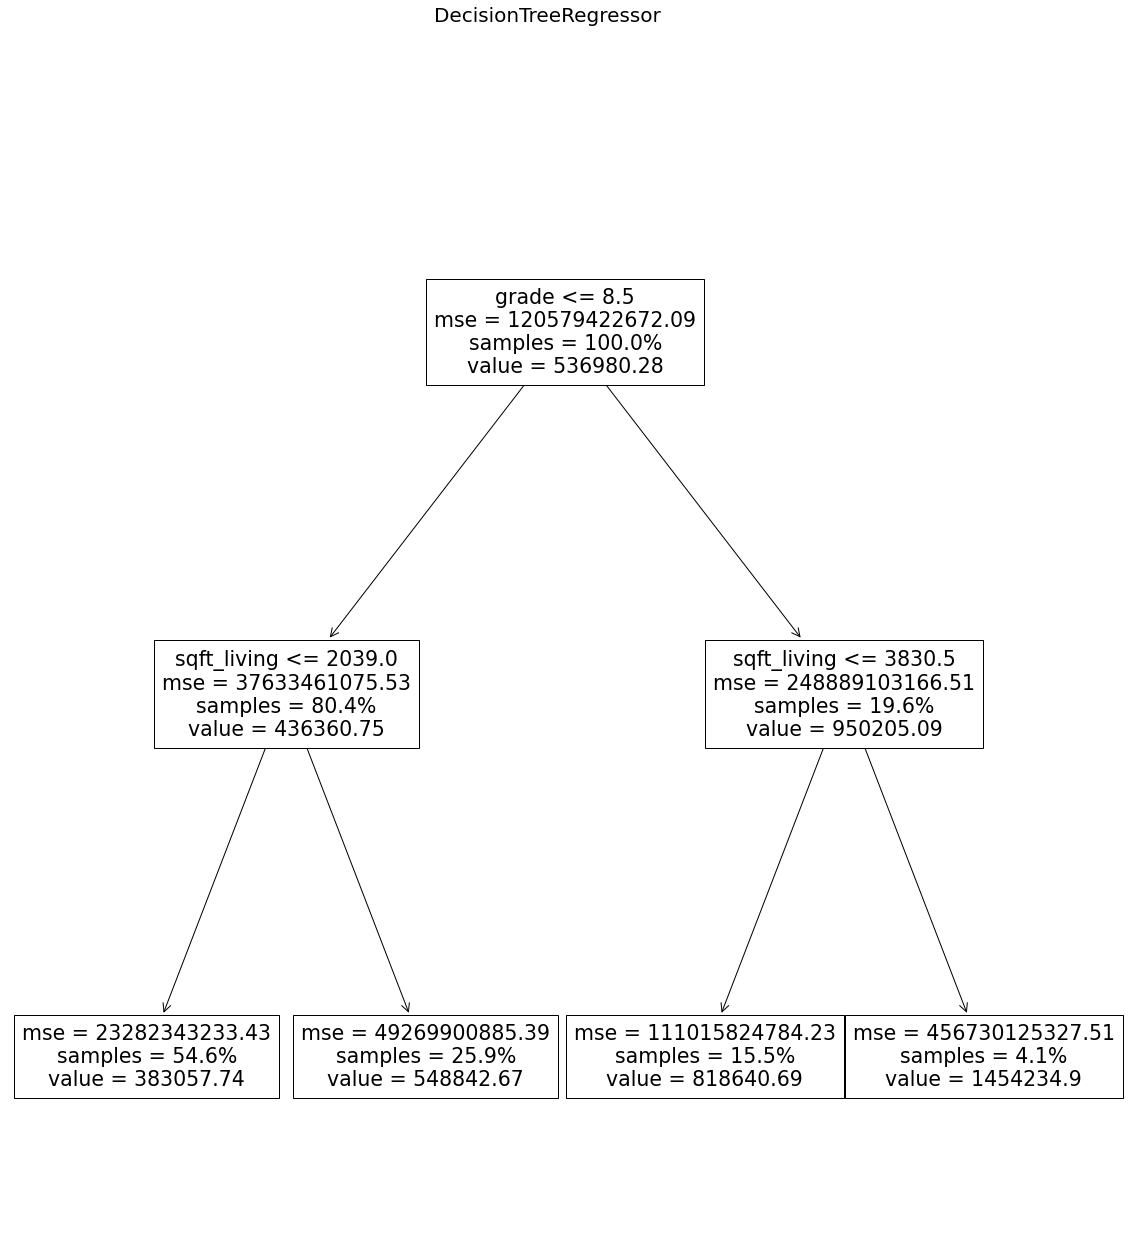

In [73]:
plt.figure(figsize=(20,20)).suptitle("DecisionTreeRegressor", fontsize=20)
tp=tree.plot_tree(regressor, proportion=True,feature_names=['bathrooms', 'grade', 'sqft_living'], precision=2)

In [23]:
#regressor?

# MSE vs max_depth
|   |   |
|---|---|
| 2 | 465412.96 |
| 3 | 481596.73 |
| 4 | 477851.25 |
| 5 | 485956.09 |

# Feature importance
Interestingly, the number of bathrooms is not important at all (0.0) and grade is the most important feature (0.685) with sqft_living only marginaly contributing (0.315).

In [ ]:
regressor.feature_importances_

# I can not use Accuracy_score on regression values
- https://stackoverflow.com/questions/37367405/python-scikit-learn-cant-handle-mix-of-multiclass-and-continuous

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#accuracy_score(y_test.astype(float), y_predict.astype(float))

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

In [34]:
print("Mean squared error                : ",np.round(mean_squared_error(y_test, y_predict[:-1]),2))
print("Square root of Mean Squared Error : ",np.round(np.sqrt(mean_squared_error(y_test, y_predict[:-1])),2))
print("Mean absolute error               : ",np.round(mean_absolute_error(y_test, y_predict[:-1]),2))

Mean squared error               :  183288753835.46
Square root of Mean Squared Error:  428122.36
Mean absolute error              :  285007.31


In [37]:
import scipy as scpy

In [53]:
np.round(scpy.stats.pearsonr(y_test, y_predict[:-1]),4)

array([-0.0056,  0.5577])

# Classification report
```
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets
```

In [46]:
#classification_report(y_test, y_predict[:-1])

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
scores = cross_val_score(regressor,train_df[['bathrooms','grade','sqft_living']], train_df['price'],cv=5 )

In [56]:
print("Accuracy: %0.2f +/- %0.2f" % (scores.mean(),scores.std()*2))

Accuracy: 0.49 +/- 0.03


In [80]:
y_train = train_df['price']

<AxesSubplot:xlabel='price', ylabel='Density'>

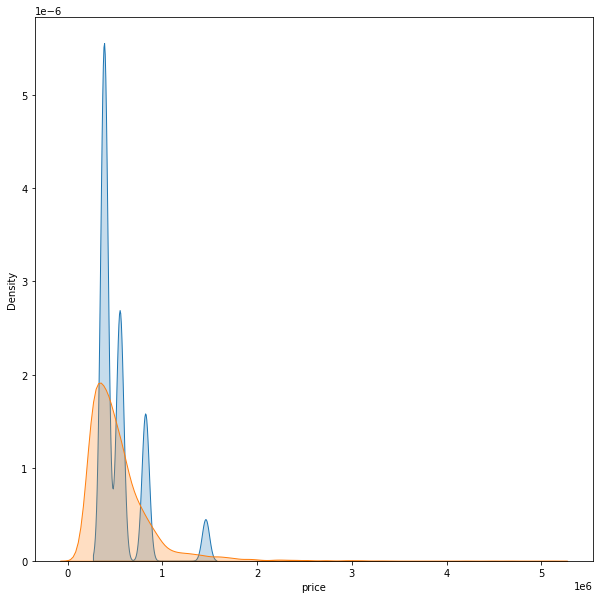

In [101]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(y_predict, ax=ax, fill = True,label='1')
sns.kdeplot(y_test, ax=ax, fill = True,label="12")

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Predicted vs Train data'}, xlabel='price', ylabel='Density'>

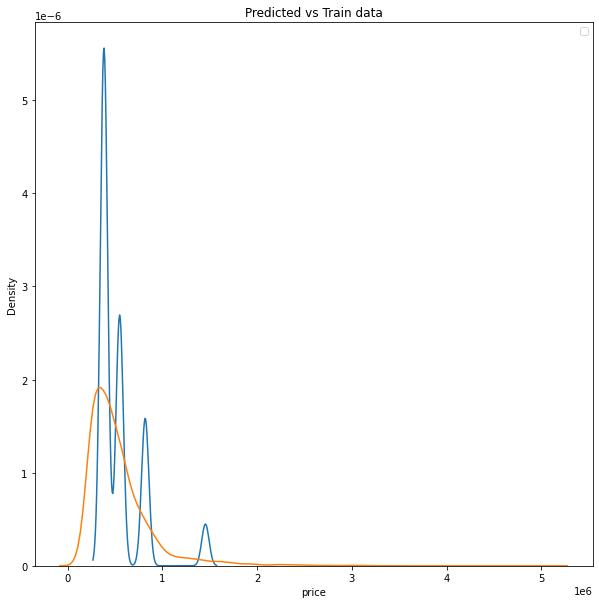

In [118]:
fig, ax = plt.subplots(figsize=(10,10))
ax.legend(loc="upper right")
ax.set_title("Predicted vs Train data")
sns.kdeplot(y_predict, ax=ax)
sns.kdeplot(y_train, ax=ax)